# Heart Disease

## Import and Examine Data

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [10]:
# Import data
df = pd.read_csv("data.csv")
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [11]:
# Split dataframe into X and y
X, y = df.drop("HadHeartAttack", axis=1), df["HadHeartAttack"]

# Check the shape of X
print(f"X shape: {X.shape}")

X shape: (246022, 39)


**Observation:** There are 246022 rows (examples) in the dataset and there are 40 columns (39 feature variables and 1 target variable).

In [12]:
# Split the feature variables into numeric and object features
numeric_features = X.select_dtypes(include="number").columns
object_features = X.select_dtypes(include="object").columns

print(f"Number of numeric features : {len(numeric_features)}")
print(f"Number of object features : {len(object_features)}")

Number of numeric features : 6
Number of object features : 33


In [13]:
#view numeric data 
numeric_info = pd.DataFrame({
    "missing_sum": X[numeric_features].isna().sum(),
    "missing_percent": X[numeric_features].isna().sum() / len(X) * 100,
    "dtypes": X[numeric_features].dtypes,
    **X[numeric_features].describe().T,
}).sort_values(by=["missing_sum"])
numeric_info

,missing_sum,missing_percent,dtypes,count,mean,std,min,25%,50%,75%,max
PhysicalHealthDays,0,0.0,float64,246022.0,4.119026,8.405844,0.00,0.00,0.00,3.00,30.00
MentalHealthDays,0,0.0,float64,246022.0,4.167140,8.102687,0.00,0.00,0.00,4.00,30.00
SleepHours,0,0.0,float64,246022.0,7.021331,1.440681,1.00,6.00,7.00,8.00,24.00
HeightInMeters,0,0.0,float64,246022.0,1.705150,0.106654,0.91,1.63,1.70,1.78,2.41
WeightInKilograms,0,0.0,float64,246022.0,83.615179,21.323156,28.12,68.04,81.65,95.25,292.57
BMI,0,0.0,float64,246022.0,28.668136,6.513973,12.02,24.27,27.46,31.89,97.65


**Observation:** There is no missing data for the numeric features of the dataset. The numeric features have varying ranges of values, so scaling/standardizing the data will be needed before modelling.

In [14]:
# Modify the description for features with lots of text
long_feature_dict = {
    "LastCheckupTime": {
        "Within past year (anytime less than 12 months ago)": "<1",
        "Within past 2 years (1 year but less than 2 years ago)": "1<2",
        "Within past 5 years (2 years but less than 5 years ago)": "2<5",
        "5 or more years ago": ">=5"
    },
    "RemovedTeeth": {
        "None of them": "None",
        "1 to 5": "1-5",
        "6 or more, but not all": ">6",
        "All": "All"
    },
    "SmokerStatus": {
        "Never smoked": "Never",
        "Former smoker": "Former",
        "Current smoker - now smokes every day": "Everyday",
        "Current smoker - now smokes some days": "Somedays"
    },
    "ECigaretteUsage": {
        "Never used e-cigarettes in my entire life": "Never",
        "Not at all (right now)": "Former",
        "Use them some days": "Somedays",
        "Use them every day": "Everyday"
    },
    "RaceEthnicityCategory": {
        "White only, Non-Hispanic": "White",
        "Hispanic": "Hispanic",
        "Black only, Non-Hispanic": "Black",
        "Other race only, Non-Hispanic": "Other",
        "Multiracial, Non-Hispanic": "Multiracial",
    },
    "AgeCategory": {
        "Age 65 to 69": "65-69",
        "Age 60 to 64": "60-64",
        "Age 70 to 74": "70-74",
        "Age 55 to 59": "55-59",
        "Age 50 to 54": "50-54",
        "Age 75 to 79": "75-79",
        "Age 80 or older": "80+",
        "Age 40 to 44": "40-44",
        "Age 45 to 49": "45-49",
        "Age 35 to 39": "35-39",
        "Age 30 to 34": "30-34",
        "Age 18 to 24": "18-24",
        "Age 25 to 29": "25-29"
    },
    "TetanusLast10Tdap": {
        "No, did not receive any tetanus shot in the past 10 years": "No",
        "Yes, received tetanus shot but not sure what type": "Yes, not sure",
        "Yes, received Tdap": "Yes, tdap",
        "Yes, received tetanus shot, but not Tdap": "Yes, not tdap",
    },
    "CovidPos": {
        "Yes": "Yes",
        "No": "No",
        "Tested positive using home test without a health professional": "Yes at home"
    },
    "HadDiabetes": {
        "No": "No",
        "Yes": "Yes",
        "No, pre-diabetes or borderline diabetes": "No, Pre/Borderline",
        "Yes, but only during pregnancy (female)": "Yes, Pregnancy",
    }
}

for feature, mapping in long_feature_dict.items():
    X[feature] = X[feature].map(mapping)
X.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadAngina,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,<1,Yes,9.0,None,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,<1,Yes,6.0,None,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, not sure",No,No
2,Alabama,Male,Very good,0.0,0.0,<1,No,8.0,>6,No,...,1.85,108.86,31.66,Yes,No,No,Yes,No,No,Yes
3,Alabama,Female,Fair,5.0,0.0,<1,Yes,9.0,None,No,...,1.70,90.72,31.32,No,No,Yes,Yes,No,No,Yes
4,Alabama,Female,Good,3.0,15.0,<1,Yes,5.0,1-5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,No,No,No


In [15]:
#view object data 
object_info = pd.DataFrame({
    "missing_sum": X[object_features].isna().sum(),
    "missing_percent": X[object_features].isna().sum() / len(X) * 100,
    "dtypes": X[object_features].dtypes,
    **X[object_features].describe().T,
}).sort_values(by=["missing_sum"])
object_info

,missing_sum,missing_percent,dtypes,count,unique,top,freq
State,0,0.0,object,246022,54,Washington,15000
TetanusLast10Tdap,0,0.0,object,246022,4,No,81747
PneumoVaxEver,0,0.0,object,246022,2,No,146130
FluVaxLast12,0,0.0,object,246022,2,Yes,131196
HIVTesting,0,0.0,object,246022,2,No,161520
AlcoholDrinkers,0,0.0,object,246022,2,Yes,135307
AgeCategory,0,0.0,object,246022,13,65-69,28557
RaceEthnicityCategory,0,0.0,object,246022,5,White,186336
ChestScan,0,0.0,object,246022,2,No,141822
ECigaretteUsage,0,0.0,object,246022,4,Never,190128


**Observation:** There is no missing data for the object features of the dataset. Most features have <= 5 unique values, except for `AgeCategory` (13) and `State` (54). Note that for the `State` feature, since it is a cardinal object type, we may need to remove it from the dataset prior to modelling.

## Exploratory Data Analysis

### Numeric Features

In [16]:
# Check the numeric features
print(numeric_features)

Index(['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
       'HeightInMeters', 'WeightInKilograms', 'BMI'],
      dtype='object')


c:\Users\IRC-240\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\IRC-240\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\IRC-240\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\IRC-240\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if p

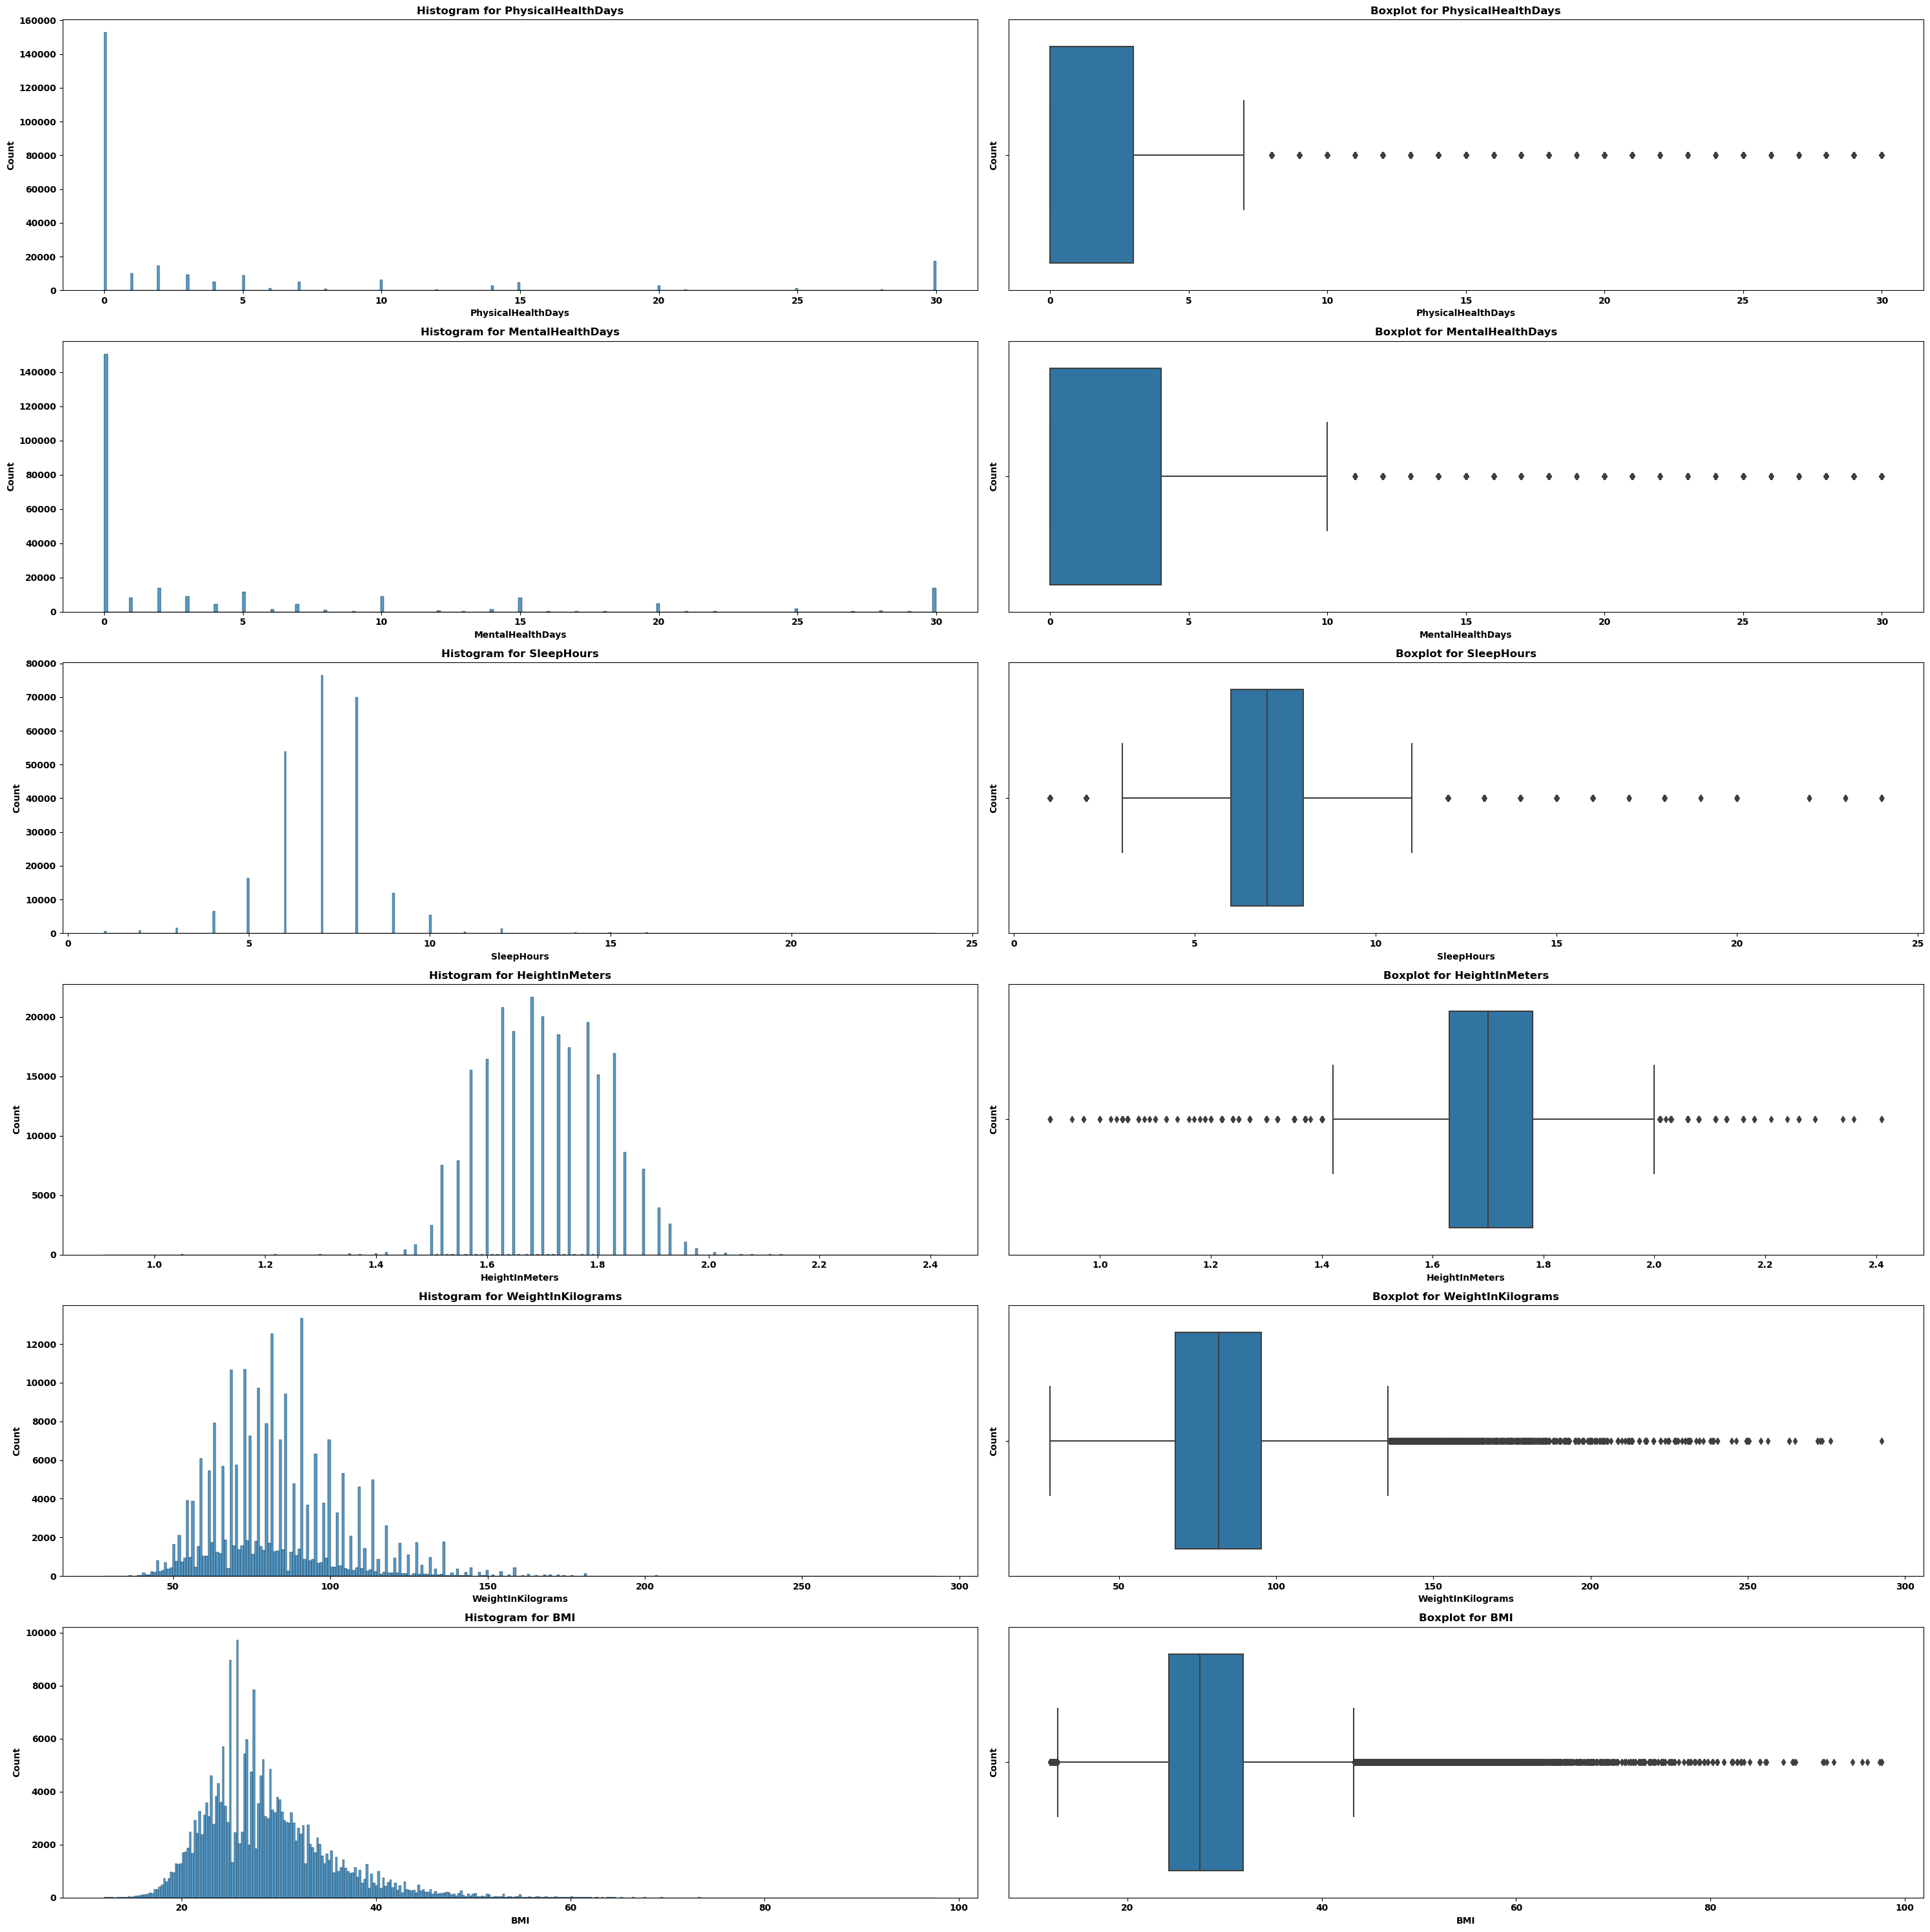

In [17]:
# Create plots to examine numeric features
fig, axes = plt.subplots(nrows=len(numeric_features), ncols=2, figsize=(30, 30))
for i, feature in enumerate(numeric_features):
    sns.histplot(X, x=feature, ax=axes[i,0])
    sns.boxplot(X, x=feature, ax=axes[i,1])
    axes[i,0].set(title=f"Histogram for {feature}", xlabel=feature, ylabel="Count")
    axes[i,1].set(title=f"Boxplot for {feature}", xlabel=feature, ylabel="Count")

plt.tight_layout()

**Observation:** All numeric features have many outliers, according to their boxplots. This will require additional preprocessing to reduce/remove these values to not affect our models' predictions. As expected most features follow a normal distribution with little to no skewness, except for `PhysicalHealthDays` and `MentalHealthDays` that seem to follow an exponential distribution. This makes sense since the average individual does not have these types of days in their routine.

### Object Features

In [18]:
# Check object features
print(object_features)

Index(['State', 'Sex', 'GeneralHealth', 'LastCheckupTime',
       'PhysicalActivities', 'RemovedTeeth', 'HadAngina', 'HadStroke',
       'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder',
       'HadKidneyDisease', 'HadArthritis', 'HadDiabetes',
       'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')


In [19]:
# Remove State and AgeCategory
small_object_features = object_features.drop(["State", "AgeCategory"])
print(len(small_object_features))

31


c:\Users\IRC-240\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\IRC-240\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\IRC-240\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\IRC-240\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.type

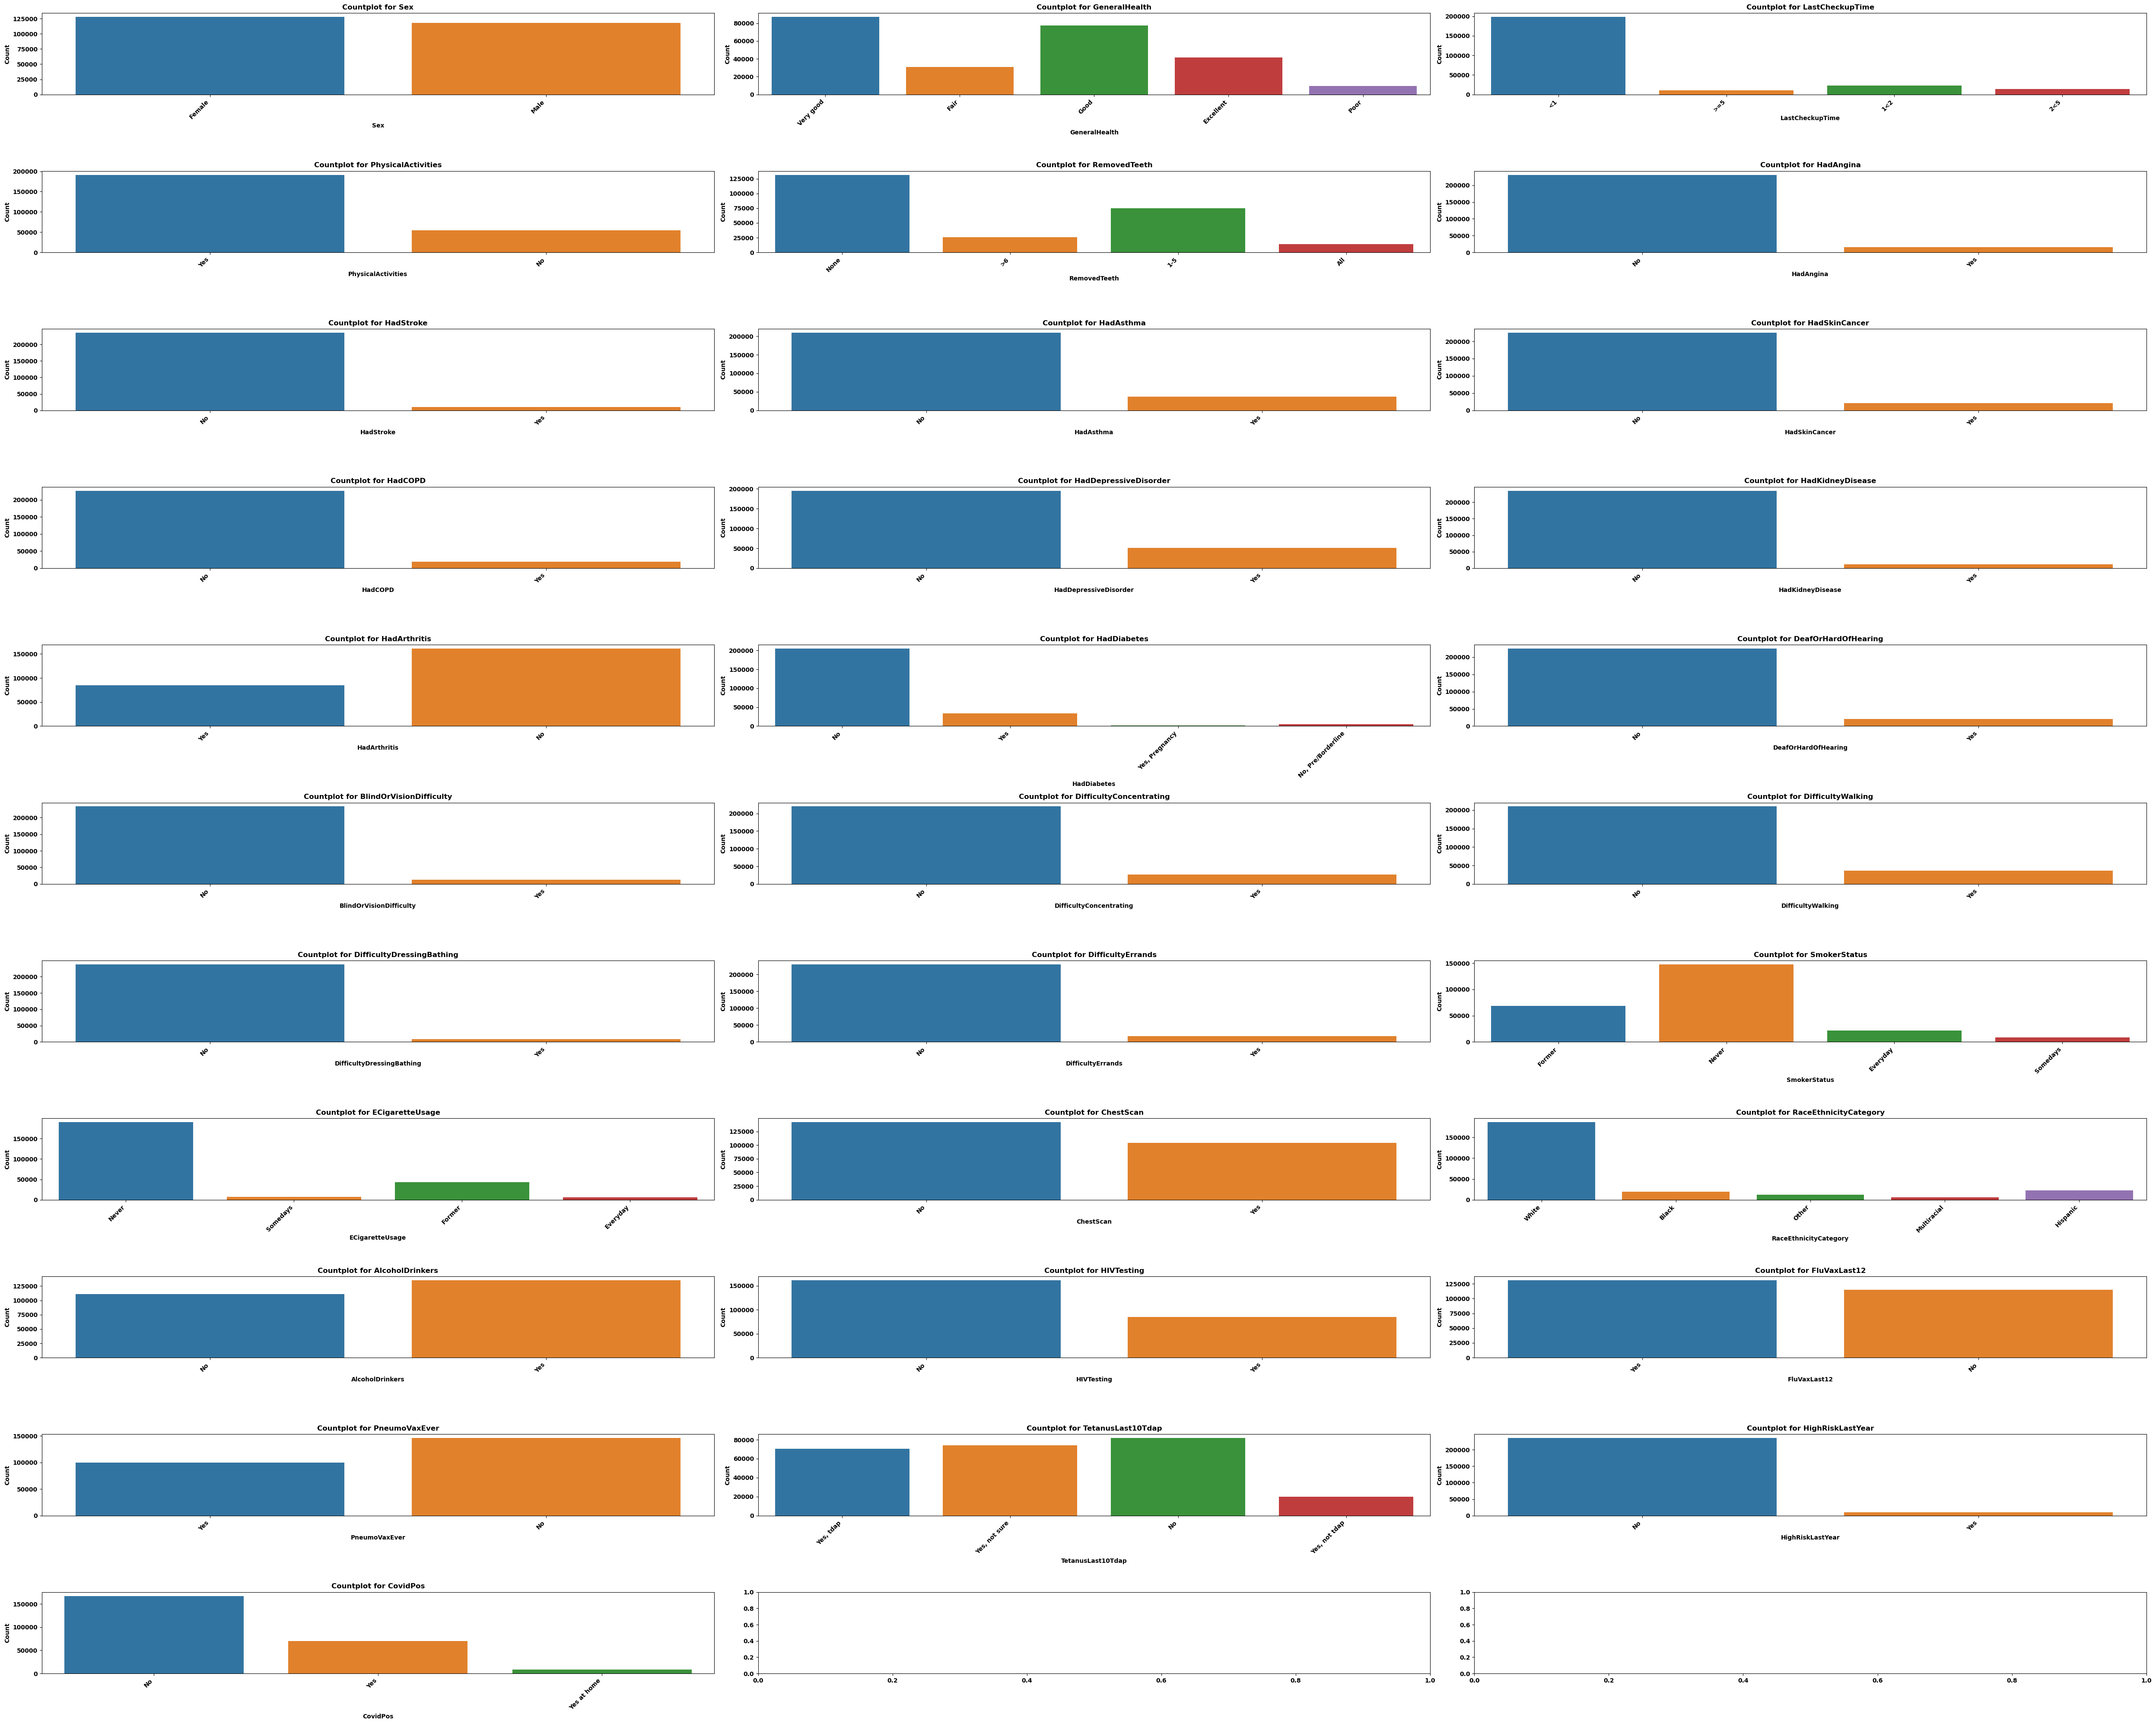

In [20]:
# Create plots to examine object features
fig, axes = plt.subplots(nrows=len(small_object_features) // 3 + 1, ncols=3, figsize=(50, 40))
axes = axes.ravel()
for i, feature in enumerate(small_object_features):
    sns.countplot(X, x=feature, ax=axes[i])
    axes[i].set(title=f"Countplot for {feature}", xlabel=feature, ylabel="Count")
    axes[i].set_xticks(axes[i].get_xticks())
    axes[i].set_xticklabels(axes[i].get_xticklabels() ,rotation=45, ha='right', fontdict={"fontsize": 10})
fig.tight_layout()

**Observation:**

c:\Users\IRC-240\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\IRC-240\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\IRC-240\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


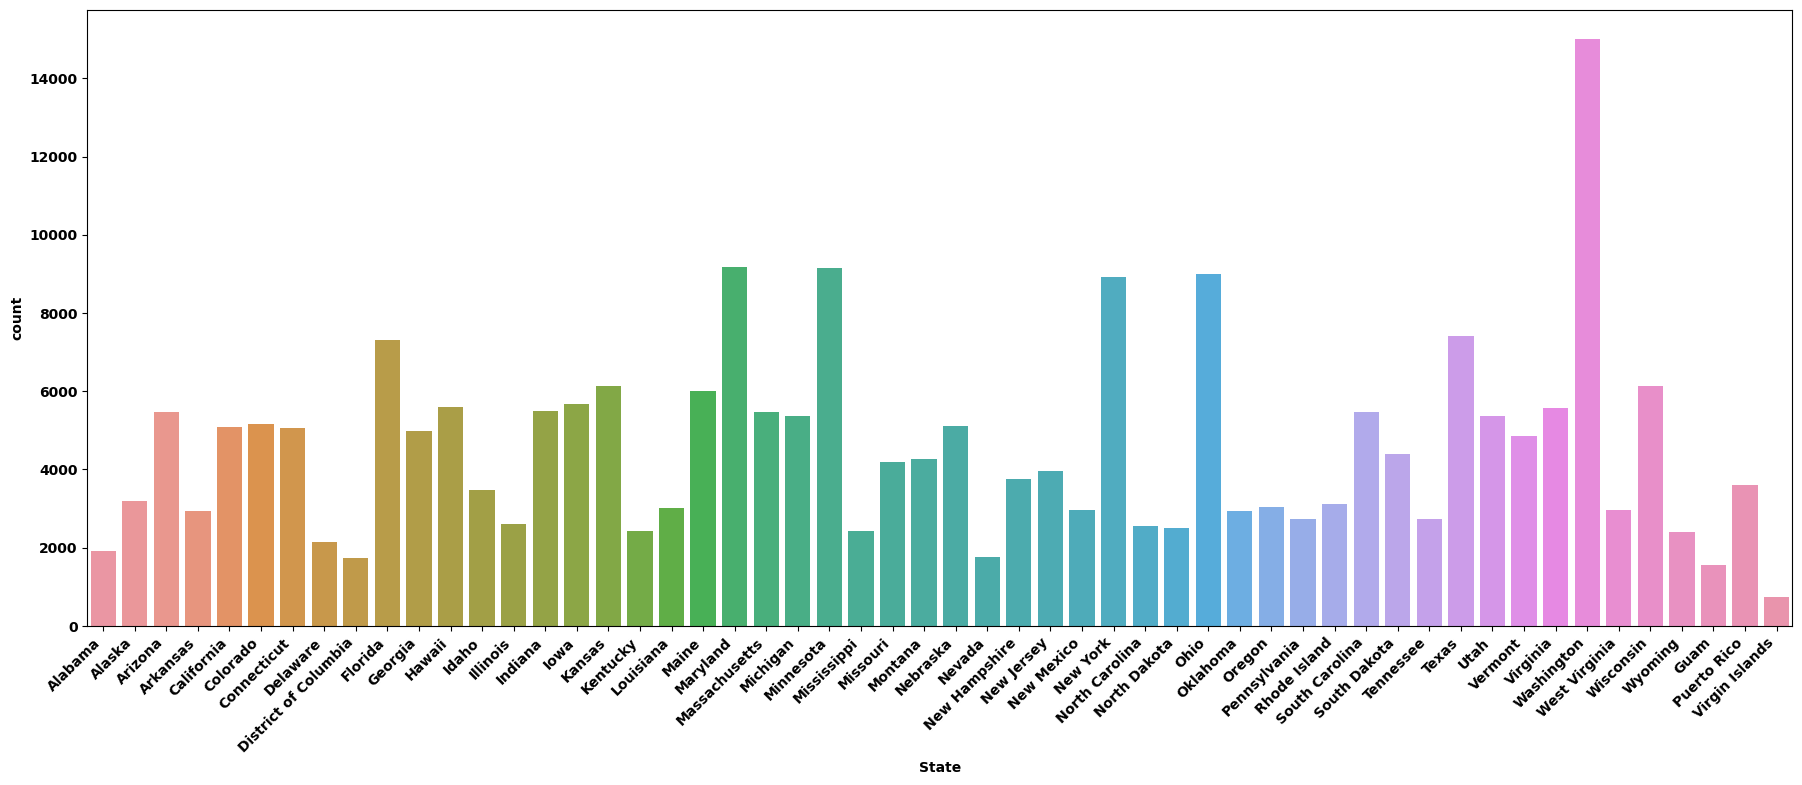

In [21]:
# View State countplot
plt.figure(figsize=(22, 8))
plt.xticks(rotation=45, ha='right')
sns.countplot(X, x="State")
plt.show()

c:\Users\IRC-240\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\IRC-240\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\IRC-240\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


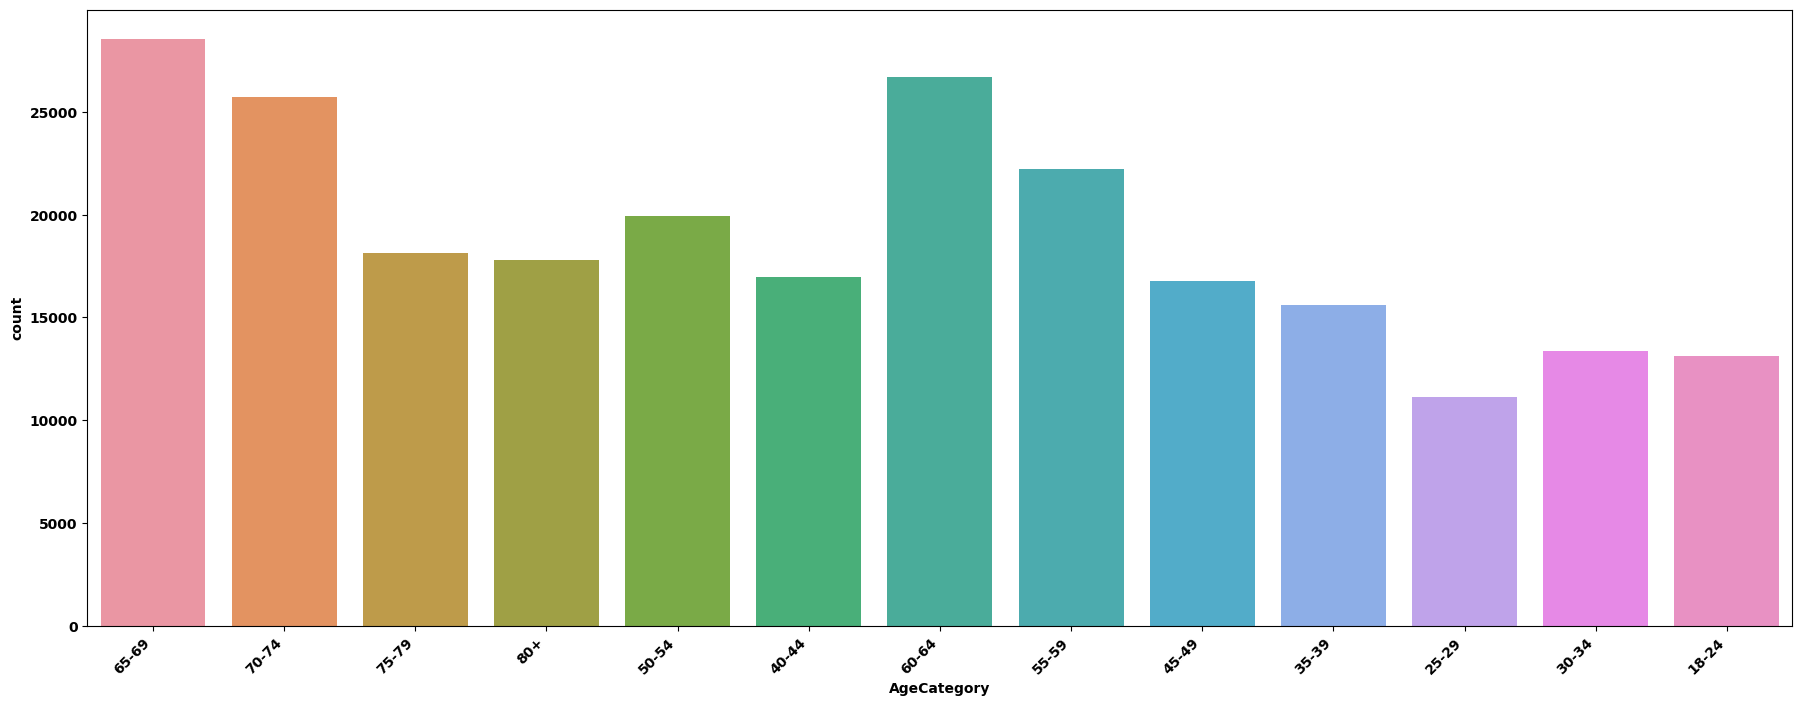

In [22]:
# View AgeCategory countplot
plt.figure(figsize=(22, 8))
plt.xticks(rotation=45, ha='right')
sns.countplot(X, x="AgeCategory")
plt.show()

In [23]:
object_features

Index(['State', 'Sex', 'GeneralHealth', 'LastCheckupTime',
       'PhysicalActivities', 'RemovedTeeth', 'HadAngina', 'HadStroke',
       'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder',
       'HadKidneyDisease', 'HadArthritis', 'HadDiabetes',
       'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')

### Data Cleaning and Feature Engineering

In [24]:
# Handle outlier
zscores = np.abs(stats.zscore(X.select_dtypes(include='number')))

# Filter out outliers using threshold of 3 
X_clean = X[(zscores < 3).all(axis=1)]

In [25]:
# Check to see the cleaned data 

print(f"Original dataset shape: {X.shape}")
print(f"Clean dataset shape: {X_clean.shape}")
print(f"There are {X.shape[0] - X_clean.shape[0]} rows with outliers beyond the threshold of 3.")

Original dataset shape: (246022, 39)
Clean dataset shape: (213401, 39)
There are 32621 rows with outliers beyond the threshold of 3.


**Observation:** There are 32621 (~13.26%) of the rows in the data have outlier values. Since we do not want to lose that much information we will keep that data and use standardization techniques to limit their effects.

In [26]:
# Create data preprocessing pipeline for data

# Import necessary classes and functions from sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [27]:
# Split X and y into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape : {X_train.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"X_test shape : {X_test.shape}")
print(f"y_test shape : {y_test.shape}")

X_train shape : (196817, 39)
y_train shape : (196817,)
X_test shape : (49205, 39)
y_test shape : (49205,)


In [28]:
# Create ordinal object feature key and value pairs
ordinal_object_features = {
    "GeneralHealth": ["Poor", "Fair", "Good", "Very good", "Excellent"],
    "AgeCategory": ["18-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", "75-79", "80+"],
    "RemovedTeeth": ["All", ">6", "1-5", "None"],
    "TetanusLast10Tdap": ["No", "Yes, not tdap", "Yes, not sure", "Yes, tdap"],
    "CovidPos": ["Yes", "Yes at home", "No"],
    "ECigaretteUsage": ["Never", "Former", "Somedays", "Everyday"],
    "SmokerStatus": ["Never", "Former", "Somedays", "Everyday"],
    "HadDiabetes": ["No", "No, Pre/Borderline", "Yes, Pregnancy", "Yes"],
    "LastCheckupTime": ["<1", "1<2", "2<5", ">=5"]
}

# Get nominal object features
nominal_object_features = object_features.drop(ordinal_object_features.keys()).tolist()

In [29]:
# Numeric feature transformer
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

# Ordinal object feature transformer
ordinal_object_feature_keys, ordinal_object_feature_values = zip(*list(ordinal_object_features.items()))
ordinal_object_transformer = Pipeline(steps=[
    ("encode", OrdinalEncoder(categories=list(ordinal_object_feature_values)))
])

# Nominal object feature transformer
nominal_object_transformer = Pipeline(steps=[
    ("encode", OneHotEncoder())
])

preprocessor = ColumnTransformer(transformers=[
    ("numeric_transformer", numeric_transformer, numeric_features),
    ("ordinal_object_transformer", ordinal_object_transformer, list(ordinal_object_feature_keys)),
    ("nominal_object_transformer", nominal_object_transformer, nominal_object_features),
], remainder="passthrough")

In [30]:
# Check if the preprocessor works as intended
preprocessor.fit(X)

df = pd.DataFrame(preprocessor.transform(X))
print(f"Missing values : {set(df.isna().sum().tolist())}")
print(f"Data types : {set(df.dtypes.tolist())}")

Missing values : {0}
Data types : {dtype('float64')}


### Modelling

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [32]:
# Build a baseline model
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(n_jobs=-1, random_state=42, verbose=0))
])

# Fit model on training set
model.fit(X_train, y_train)

# Evaluate model on validation set
model.score(X_test, y_test)

0.9490702164414185

In [33]:
# Perform a grid search cross-validation

# Define the parameter grid
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [6, 8, 10, None],
    "min_samples_leaf": [1, 3, 5],
    "min_samples_split": [2, 4, 6],
}

# Build a grid search model
model_gs = GridSearchCV(model["model"], param_grid=param_grid, cv=3)

# Fit model on the full training dataset
X_transformed = model["preprocessor"].fit_transform(X)
model_gs.fit(X_transformed, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid={'max_depth': [6, 8, 10, None],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200, 300]})

In [34]:
# Get best parameters found from grid search
best_params = model_gs.best_estimator_.get_params()
print(f"Best parameters found: {best_params}")

# Instantiate tuned model
model_tuned = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(**best_params))
])

# Fit tuned model on training set
model_tuned.fit(X_train, y_train)

# Evaluate model on validation set
model_tuned.score(X_test, y_test)

Best parameters found: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


0.949212478406666

In [35]:
# Save model
from joblib import dump
from joblib import load

model_file_name = "model.joblib"
dump(model, model_file_name)

['model.joblib']

In [36]:
from joblib import load
load(model_file_name)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric_transformer',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
       'HeightInMeters', 'WeightInKilograms', 'BMI'],
      dtype='object')),
                                                 ('ordinal_object_transformer',
                                                  Pipeline(steps=[('encode',
                                                                   OrdinalEncoder(c...
                                                   'HadKidneyDisease',
                                                   'HadArthritis',
                                                   'DeafOrHardOfHearing',
                                                   'BlindOrVisionDifficulty',
                                                   'DifficultyConcentrating',
                                                   'DifficultyWalking',
                                                   'DifficultyDressingBathing',
                                                   'DifficultyErrands',
                                                   'ChestScan',
                                                   'RaceEthnicityCategory',
                                                   'AlcoholDrinkers',
                                                   'HIVTesting', 'FluVaxLast12',
                                                   'PneumoVaxEver',
                                                   'HighRiskLastYear'])])),
                ('model', RandomForestClassifier(n_jobs=-1, random_state=42))])

In [37]:
model_loaded = load(model_file_name)


In [38]:
model_loaded.predict(X_train)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)